# Importing Libraries






In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

# Importing Deep Learning Libraries

In [2]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.optimizers import Adam,SGD,RMSprop

# Displaying Images

In [3]:
picture_size = 48
folder_path = "C:/Users/KIIT/Desktop/CODES/Project/images"

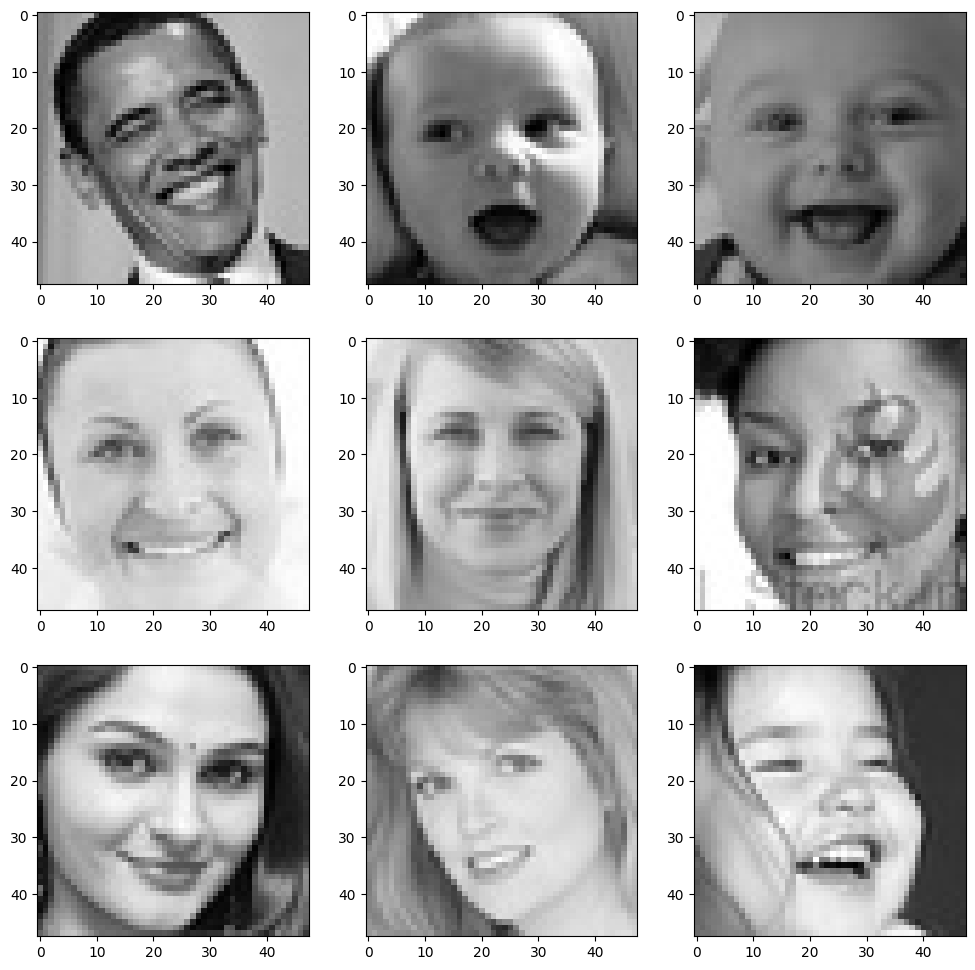

In [4]:
expression = 'happy'

plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(folder_path+"/train/"+expression+"/"+
                  os.listdir(folder_path + "/train/" + expression)[i], target_size=(picture_size, picture_size))
    plt.imshow(img)   
plt.show()

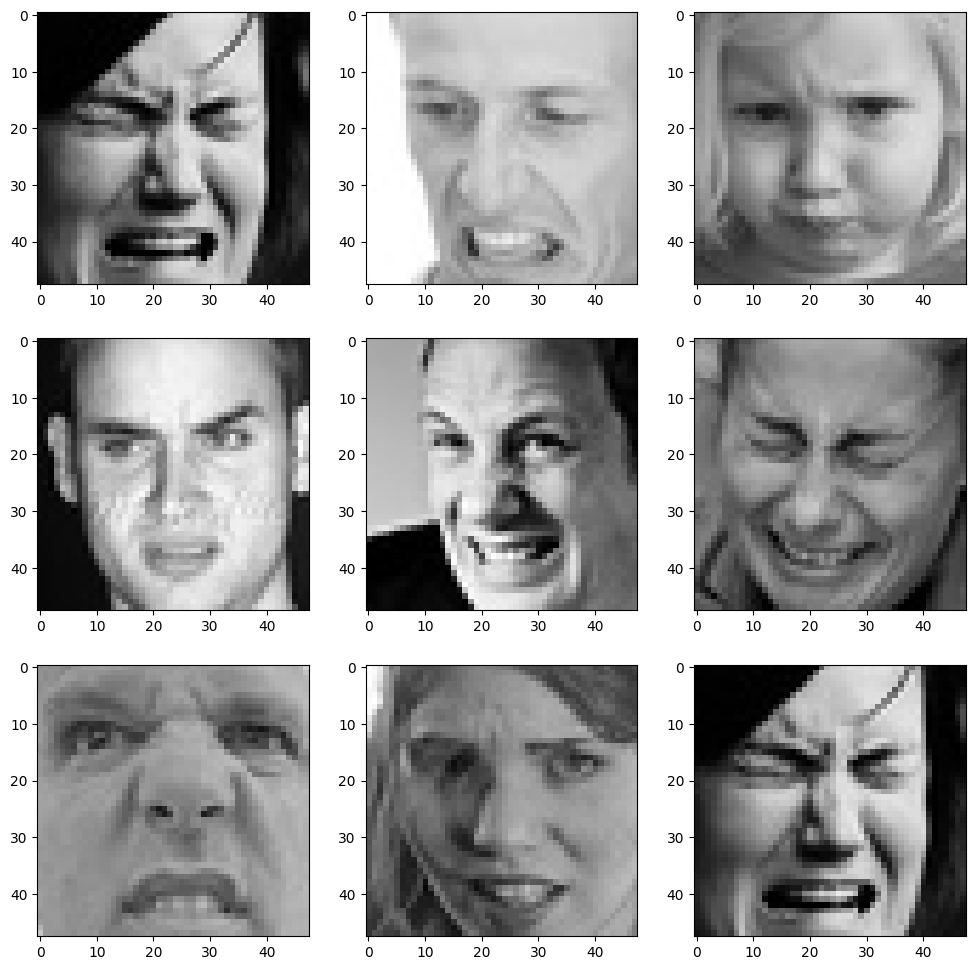

In [5]:
expression = 'disgust'

plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(folder_path+"/train/"+expression+"/"+
                  os.listdir(folder_path + "/train/" + expression)[i], target_size=(picture_size, picture_size))
    plt.imshow(img)   
plt.show()

# Making Training and Validation Data

In [6]:
batch_size=128
datagen_train=ImageDataGenerator()
datagen_val=ImageDataGenerator()

train_set= datagen_train.flow_from_directory(folder_path+"/train",
                                            target_size=(picture_size,picture_size),
                                            color_mode="grayscale",
                                             batch_size=batch_size,
                                            class_mode="categorical",
                                            shuffle=True)
test_set=datagen_val.flow_from_directory(folder_path+"/validation",
                                       target_size=(picture_size,picture_size),
                                       color_mode="grayscale",
                                       batch_size=batch_size,
                                       class_mode="categorical",
                                       shuffle=False)

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


# Model Building

In [7]:
no_of_classes=7

model=Sequential()

#1st CNN layer
model.add(Conv2D(64,(3,3),padding="same",input_shape=(48,48,1)))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))


#2nd CNN layer
model.add(Conv2D(128,(5,5),padding="same"))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

#3rd CNN layer
model.add(Conv2D(512,(3,3),padding="same"))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

#4th CNN layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

#Fully connected 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(no_of_classes,activation="softmax"))

opt = Adam(lr = 0.0001)
model.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        640       
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 64)       256       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 128)       2

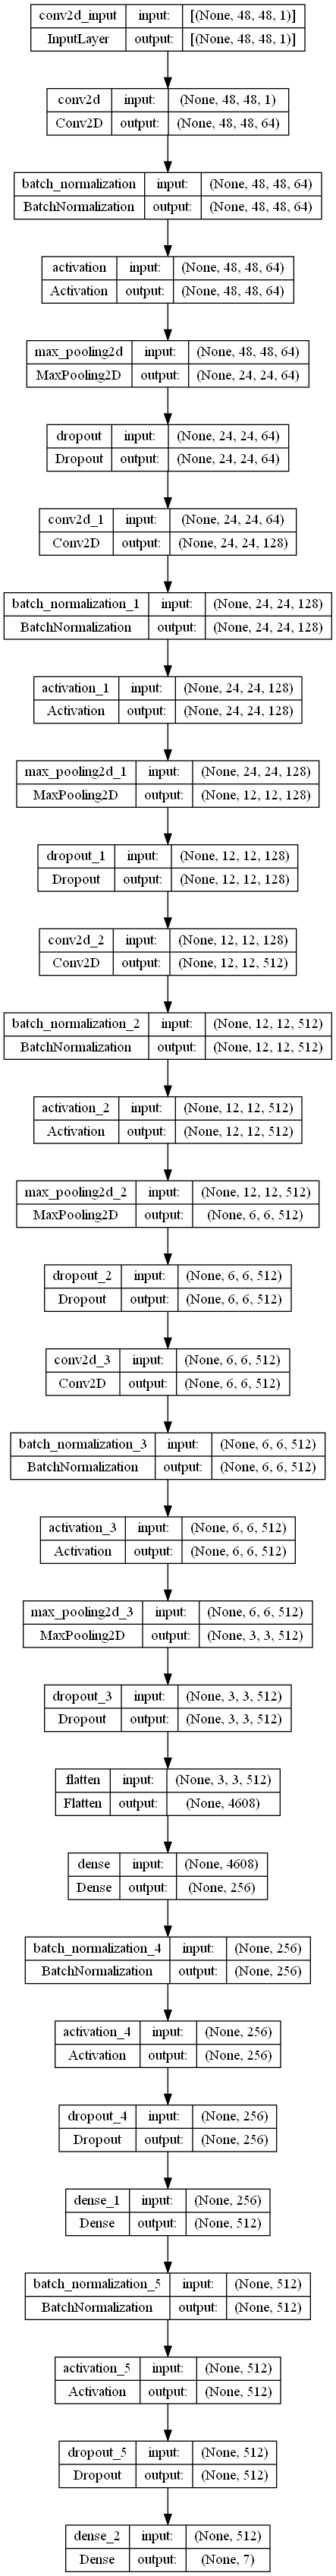

In [8]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

# Fitting the Model with Training and Validation Data

In [9]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./model.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

callbacks_list = [early_stopping,checkpoint,reduce_learningrate]

epochs = 5

model.compile(loss='categorical_crossentropy',
              optimizer = Adam(lr=0.001),
              metrics=['accuracy'])

In [10]:
history = model.fit_generator(generator=train_set,
                                steps_per_epoch=train_set.n//train_set.batch_size,
                                epochs=epochs,
                                validation_data = test_set,
                                validation_steps = test_set.n//test_set.batch_size,
                                callbacks=callbacks_list
                                )

C:\Users\KIIT\AppData\Local\Temp\ipykernel_6292\3853974908.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(generator=train_set,


Epoch 1/5
225/225 [==============================] - ETA: 0s - loss: 1.7918 - accuracy: 0.3117WARNING:tensorflow:Can save best model only with val_acc available, skipping.


225/225 [==============================] - 842s 4s/step - loss: 1.7918 - accuracy: 0.3117 - val_loss: 1.7780 - val_accuracy: 0.3537 - lr: 0.0010
Epoch 2/5
225/225 [==============================] - ETA: 0s - loss: 1.4503 - accuracy: 0.4469WARNING:tensorflow:Can save best model only with val_acc available, skipping.


225/225 [==============================] - 1142s 5s/step - loss: 1.4503 - accuracy: 0.4469 - val_loss: 1.5398 - val_accuracy: 0.3827 - lr: 0.0010
Epoch 3/5
225/225 [==============================] - ETA: 0s - loss: 1.2878 - accuracy: 0.5081WARNING:tensorflow:Can save best model only with val_acc available, skipping.


225/225 [==============================] - 1082s 5s/step - loss: 1.2878 - accuracy: 0.5081 - val_loss: 1.3219 - val_accuracy: 0.5026 - lr: 0.0010
Epoch 4/5
225/225 [==============================] - ETA: 0s - loss: 1.2042 - accuracy: 0.5402WARNING:tensorflow:Can save best model only with val_acc available, skipping.


225/225 [==============================] - 1078s 5s/step - loss: 1.2042 - accuracy: 0.5402 - val_loss: 1.1910 - val_accuracy: 0.5401 - lr: 0.0010
Epoch 5/5
225/225 [==============================] - ETA: 0s - loss: 1.1404 - accuracy: 0.5638WARNING:tensorflow:Can save best model only with val_acc available, skipping.


225/225 [==============================] - 613s 3s/step - loss: 1.1404 - accuracy: 0.5638 - val_loss: 1.3910 - val_accuracy: 0.4697 - lr: 0.0010


In [11]:
model.save_weights('face_emotion_model.h5')

# Plotting Accuracy & Loss

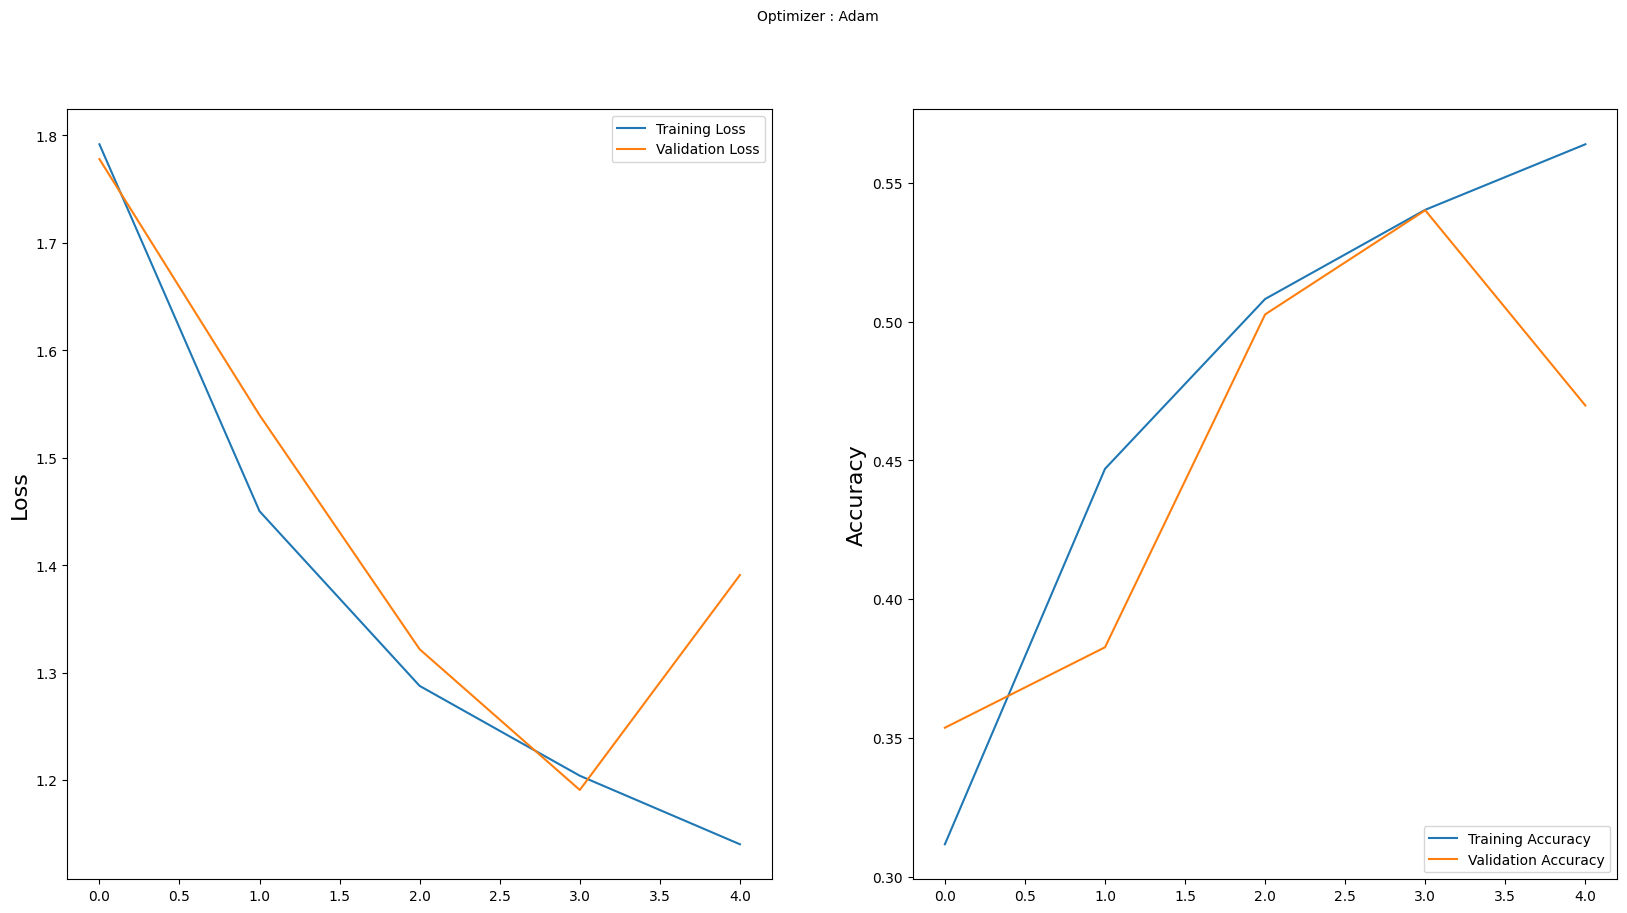

In [12]:
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

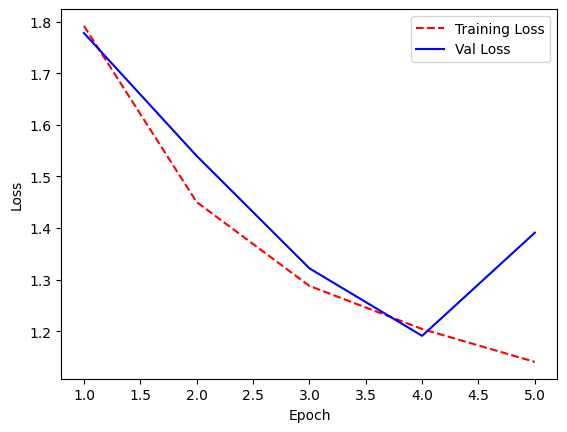

In [13]:
training_loss = history.history['loss']
val_loss = history.history['val_loss']
plt.rcParams['figure.figsize'] = [10, 5]
plt.style.use(['default'])
# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, val_loss, 'b-')
plt.legend(['Training Loss', 'Val Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

226/226 [==============================] - 124s 546ms/step
Confusion Matrix
[[ 309    7  591  450  515 1420  701]
 [  45    1   68   40   55  147   80]
 [ 303   11  615  485  528 1413  748]
 [ 548   10 1169  794  867 2401 1375]
 [ 358    9  771  576  654 1734  880]
 [ 383    9  743  622  555 1739  887]
 [ 264    8  483  350  384 1138  578]]
Classification Report
              precision    recall  f1-score   support

       angry       0.14      0.08      0.10      3993
     disgust       0.02      0.00      0.00       436
        fear       0.14      0.15      0.14      4103
       happy       0.24      0.11      0.15      7164
     neutral       0.18      0.13      0.15      4982
         sad       0.17      0.35      0.23      4938
    surprise       0.11      0.18      0.14      3205

    accuracy                           0.16     28821
   macro avg       0.14      0.14      0.13     28821
weighted avg       0.17      0.16      0.15     28821



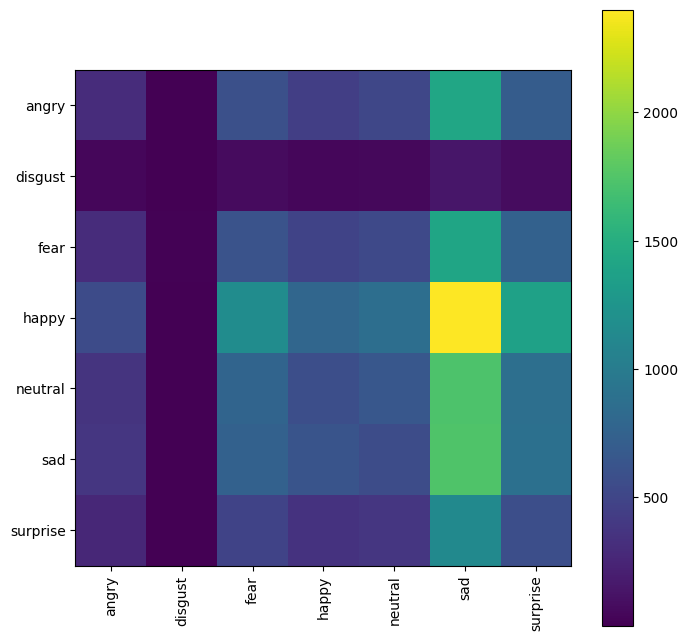

In [14]:
y_pred = model.predict(train_set)
y_pred = np.argmax(y_pred, axis=1)
class_labels = test_set.class_indices
class_labels = {v:k for k,v in class_labels.items()}

from sklearn.metrics import classification_report, confusion_matrix
cm_train = confusion_matrix(train_set.classes, y_pred)
print('Confusion Matrix')
print(cm_train)
print('Classification Report')
target_names = list(class_labels.values())
print(classification_report(train_set.classes, y_pred, target_names=target_names))

plt.figure(figsize=(8,8))
plt.imshow(cm_train, interpolation='nearest')
plt.colorbar()
tick_mark = np.arange(len(target_names))
_ = plt.xticks(tick_mark, target_names, rotation=90)
_ = plt.yticks(tick_mark, target_names)

56/56 [==============================] - 46s 830ms/step
Confusion Matrix
[[257   3 163   3 106 320 108]
 [ 18  11  26   1   5  42   8]
 [ 75   1 357   5  52 304 224]
 [113   1 189 829  99 469 125]
 [ 28   0 149  14 463 471  91]
 [ 35   0 158   3 121 754  68]
 [  4   0  77  10  14  34 658]]
Classification Report
              precision    recall  f1-score   support

       angry       0.48      0.27      0.34       960
     disgust       0.69      0.10      0.17       111
        fear       0.32      0.35      0.33      1018
       happy       0.96      0.45      0.62      1825
     neutral       0.54      0.38      0.45      1216
         sad       0.31      0.66      0.43      1139
    surprise       0.51      0.83      0.63       797

    accuracy                           0.47      7066
   macro avg       0.55      0.43      0.42      7066
weighted avg       0.57      0.47      0.47      7066



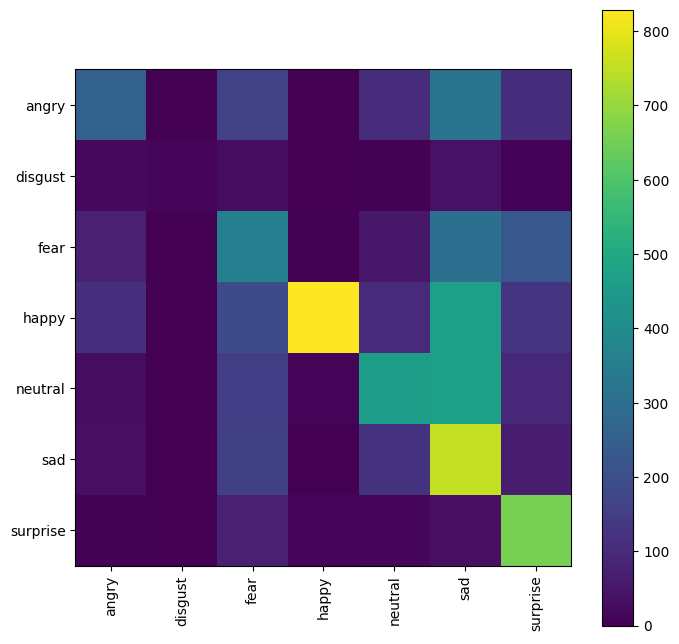

In [15]:
#TEST SET
y_pred = model.predict(test_set)
y_pred = np.argmax(y_pred, axis=1)

cm_test = confusion_matrix(test_set.classes, y_pred)
print('Confusion Matrix')
print(cm_test)
print('Classification Report')
target_names = list(class_labels.values())
print(classification_report(test_set.classes, y_pred, target_names=target_names))

plt.figure(figsize=(8,8))
plt.imshow(cm_test, interpolation='nearest')
plt.colorbar()
tick_mark = np.arange(len(target_names))
_ = plt.xticks(tick_mark, target_names, rotation=90)
_ = plt.yticks(tick_mark, target_names)